# Instructions 

Sample 1: Coding Exercise for the Data Scientist Position (Take Home)

**Instructions**    

This coding exercise should be performed in python (which is the programming language used by the team). You are free to use the internet and any other libraries. Please save your work in a Jupyter notebook and email it to us for review  .

Objective: Build a regressor that recommends the “crew” size for potential ship buyers. Please do the following steps (hint: use numpy, scipy, pandas, sklearn and matplotlib)  

1. Read the file and display columns.
2. Calculate basic statistics of the data (count, mean, std, etc) and examine data and state your observations.
3. Select columns that will be probably important to predict “crew” size.
4. If you removed columns explain why you removed those.
5. Use one-hot encoding for categorical features.
6. Create training and testing sets (use 60% of the data for the training and reminder for testing).
7. Build a machine learning model to predict the ‘crew’ size.
8. Calculate the Pearson correlation coefficient for the training set and testing data sets.
9. Describe hyper-parameters in your model and how you would change them to improve the performance of the model.
10. What is regularization? What is the regularization parameter in your model?  

Plot regularization parameter value vs Pearson correlation for the test and training sets, and see whether your model has a bias problem or variance problem.

https://pub.towardsai.net/data-scientist-coding-exercise-e62f4de7df9e

# 1. Read the file and diplay the columns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
data = pd.read_csv('cruise_ship_info.csv')

In [3]:
data.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [4]:
data.shape

(158, 9)

In [5]:
# making column names lowercase
data = data.rename(str.lower, axis='columns')
data.head(1)

,ship_name,cruise_line,age,tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55


# 2. Calculate basic statistics
...of the data (count, mean, std, etc) and examine data and state your observations.


In [6]:
data.describe()

,age,tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


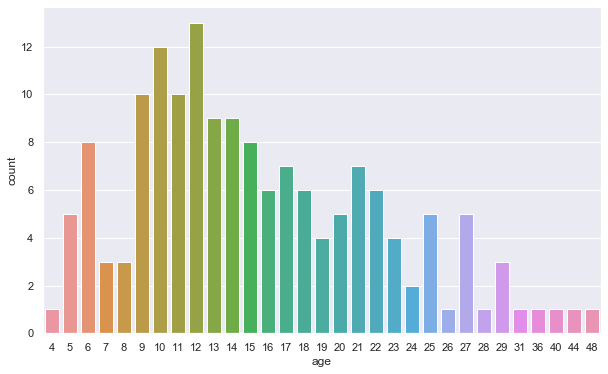

In [7]:
sns.set(rc={'figure.figsize':(10, 6)})
sns.countplot(x=data.age)

In [13]:
data.tonnage

0       30.277
1       30.277
2       47.262
3      110.000
4      101.353
        ...   
153      3.341
154     76.800
155      5.350
156      5.350
157     14.745
Name: tonnage, Length: 158, dtype: float64

In [18]:
len(pd.unique(data.tonnage))

94

In [ ]:
So the xticks should run from

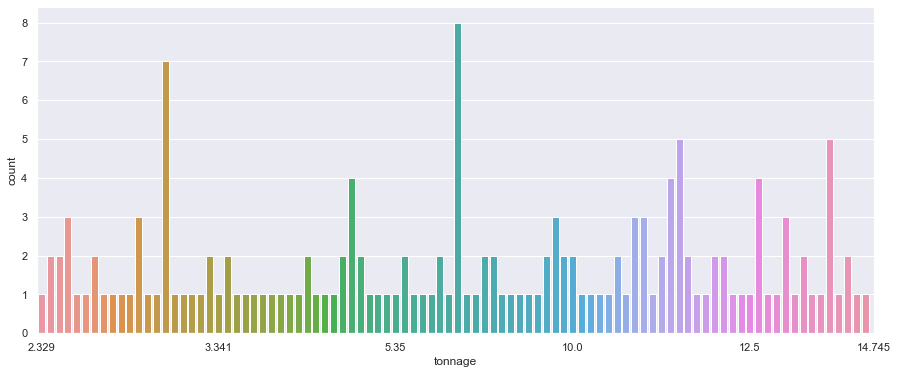

In [19]:
sns.set(rc={'figure.figsize':(15, 6)})

g = sns.countplot(x=data.tonnage)
g.set(xticks=([0, 20, 40, 60, 80, 94]))

plt.show()

I'm not sure what's going on with this graph. Why does it only go up to 14.745, when the weights are much higher? 

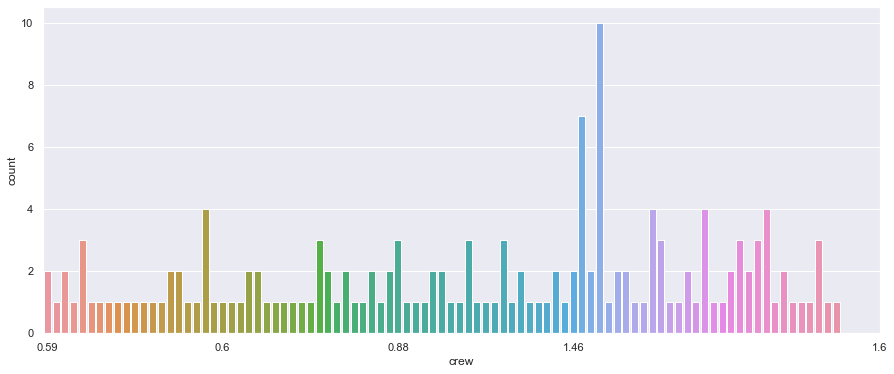

In [47]:
sns.set(rc={'figure.figsize':(15, 6)})
g = sns.countplot(x=data.crew)
g.set(xticks=([0, 20, 40, 60, 95]))
plt.show()

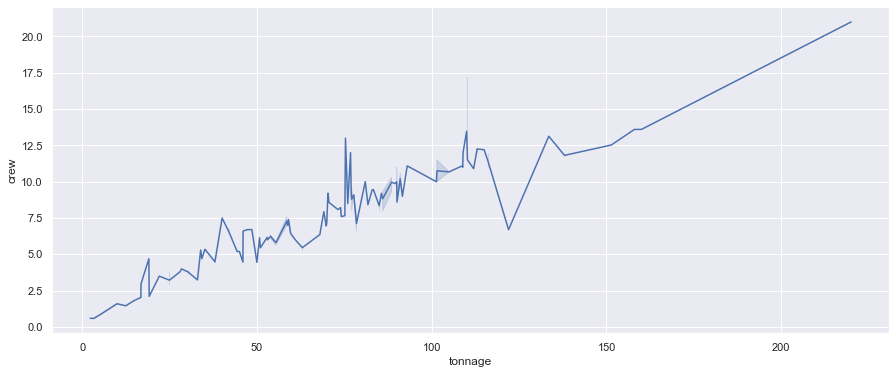

In [52]:
sns.set(rc={'figure.figsize':(15, 6)})
g = sns.lineplot(x=data.tonnage, y=data.crew)

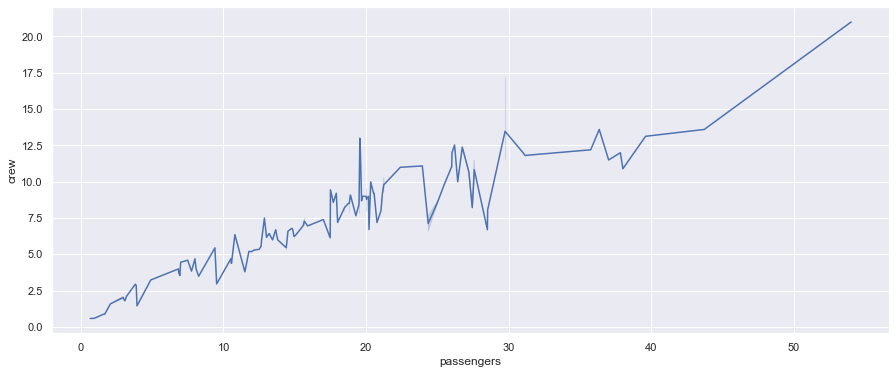

In [53]:
sns.set(rc={'figure.figsize':(15, 6)})
g = sns.lineplot(x=data.passengers, y=data.crew)

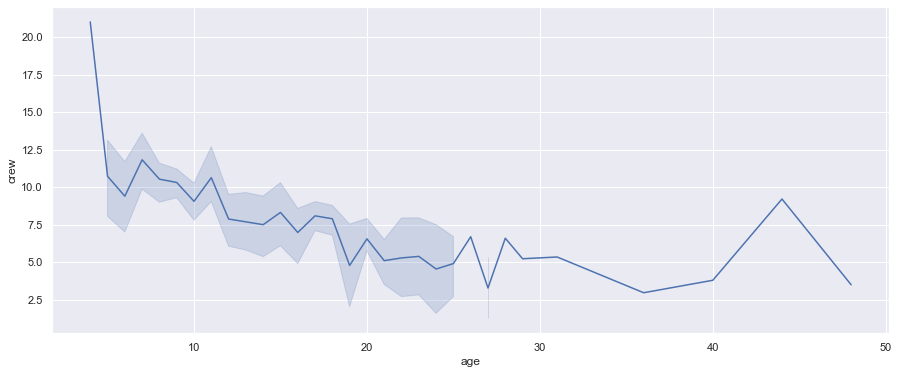

In [54]:
sns.set(rc={'figure.figsize':(15, 6)})
g = sns.lineplot(x=data.age, y=data.crew)

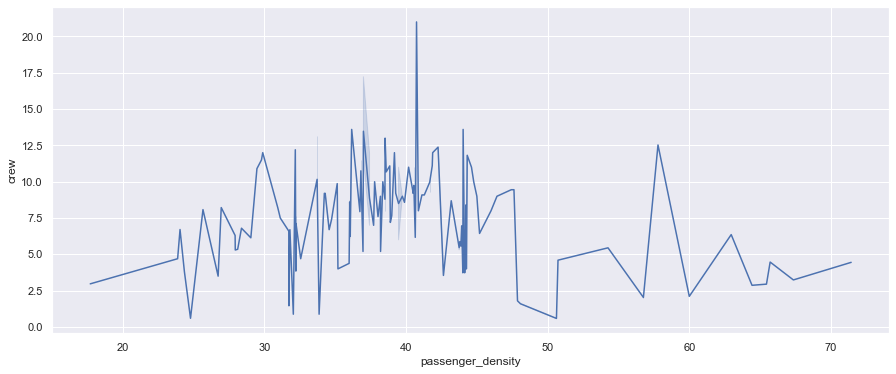

In [55]:
sns.set(rc={'figure.figsize':(15, 6)})
g = sns.lineplot(x=data.passenger_density, y=data.crew)

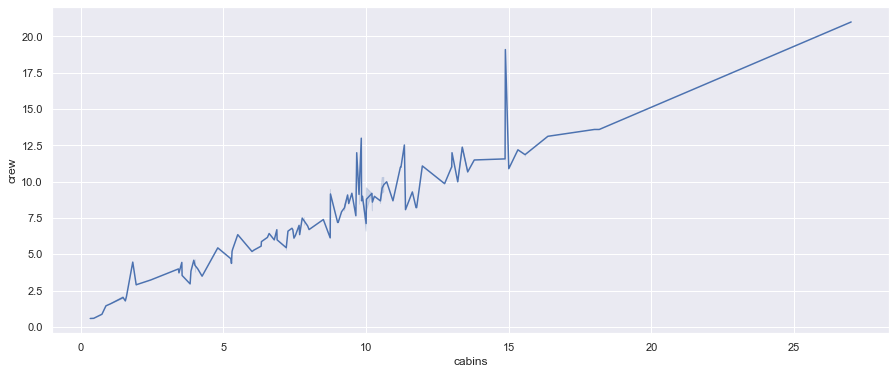

In [56]:
sns.set(rc={'figure.figsize':(15, 6)})
g = sns.lineplot(x=data.cabins, y=data.crew)

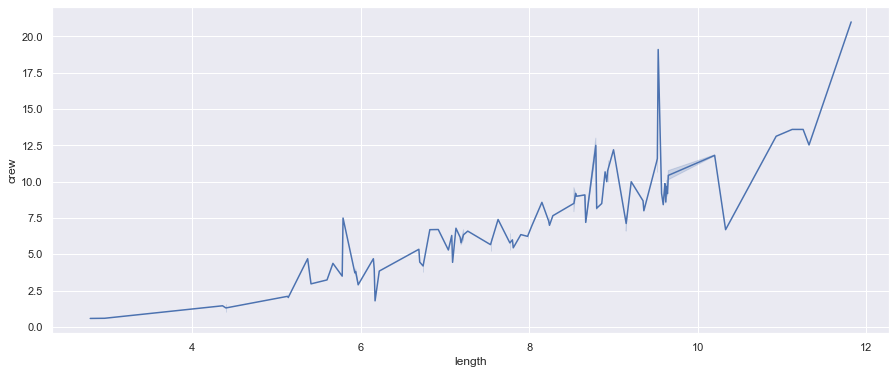

In [57]:
sns.set(rc={'figure.figsize':(15, 6)})
g = sns.lineplot(x=data.length, y=data.crew)

Line graphs show strong correlation between crew size and:  
- tonnage  
- passengers 
- cabins  

OK correlation
- length 


Weak correlation:  
- age
- passenger_density 

